In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
energy_data=pd.read_csv('C:\\Users\HP\\Downloads\\hamoye\\dataset\\energydata_complete.csv')
energy_data.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


# Simple Linear Regression

In [31]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [33]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [35]:
df = df.rename(columns=column_names)

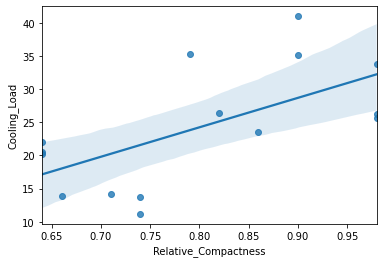

In [36]:
simple_linear_reg_df=df[['Relative_Compactness','Cooling_Load']].sample(15,random_state=3)
sns.regplot(x='Relative_Compactness',y='Cooling_Load',data=simple_linear_reg_df)

# MEASURING REGRESSION PERFORMANCE


# Mean absolute error

In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']





In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_df , heating_target, test_size=0.3 ,random_state=1)



In [183]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
pred_values=linear_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,pred_values)

In [184]:
round(mae,3)

0.063

# Residual sum of squared (Variance)

In [55]:
import numpy as np
rss=np.sum(np.square(y_test - pred_values))
round(rss,3)

1.827

# Root Mean squared error

In [58]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred_values))
round(rmse, 3)

0.089

# R-Squared 

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true

In [59]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred_values)
round(r2_score,3)

0.893

# Penalization Methods

Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model.Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.


# ridge regression

In [60]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

In [62]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

# comparing the effects of reguarlization

In [82]:
def get_weights_df(model,feat,col_name):
    weights=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns =['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df



In [79]:
linear_model_weights=get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridge_reg,x_train,'Ridge_weight')
lasso_weights_df=get_weights_df(lasso_reg,x_train,'Lasso_weight')

In [80]:
final_weights=pd.merge(linear_model_weights,ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights,lasso_weights_df, on='Features')

In [83]:
final_weights

,Features,Linear_Model_Weight,Ridge_weight,Lasso_weight
0,Surface_Area,-5.620066e+12,-0.062275,0.000000
1,Relative_Compactness,-5.855289e-01,-0.283471,-0.027719
2,Orientation,3.376007e-03,0.003369,0.000000
3,Glazing_Area_Distribution,2.662706e-02,0.029088,0.021431
4,Glazing_Area,2.148657e-01,0.212449,0.206132
5,Overall_Height,3.945312e-01,0.442467,0.463482
6,Wall_Area,3.278372e+12,0.103061,0.200087
7,Roof_Area,4.215050e+12,-0.163192,-0.000000


In [81]:
final_weights

,Features,Linear_Model_Weight,Ridge_weight,Lasso_weight
0,Surface_Area,-5.620066e+12,-0.062275,0.000000
1,Relative_Compactness,-5.855289e-01,-0.283471,-0.027719
2,Orientation,3.376007e-03,0.003369,0.000000
3,Glazing_Area_Distribution,2.662706e-02,0.029088,0.021431
4,Glazing_Area,2.148657e-01,0.212449,0.206132
5,Overall_Height,3.945312e-01,0.442467,0.463482
6,Wall_Area,3.278372e+12,0.103061,0.200087
7,Roof_Area,4.215050e+12,-0.163192,-0.000000


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")


energy_data.info()

In [21]:
energy_data=pd.read_csv('C:\\Users\HP\\Downloads\\hamoye\\dataset\\energydata_complete.csv')
energy_data.head(10)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [22]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [23]:
energy_data['date'] = ((pd.to_datetime(energy_data['date']).dt.dayofweek)// 5 == 1).astype(float)

energy_data['date'].value_counts()

0.0    14263
1.0     5472
Name: date, dtype: int64

In [24]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  float64
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [25]:
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_var[target_var <= 200].count()) / (len(target_var)))*100 )

Percentage of the appliance consumption is less than 200 Wh
100.0


# METHOD 1

In [26]:
energy_data.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.277274,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,0.447664,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,0.000000,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,0.000000,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,0.000000,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,1.000000,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1.000000,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [114]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Importing required libraries for modelling and model evaluation

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
feature_var = normalised_df.drop(columns=['date', 'lights','Appliances'])
target_var = normalised_df['Appliances']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_var,target_var, test_size=0.3 ,random_state=42)



In [115]:
models={'LinearRegression':LinearRegression(),
    'Ridge': Ridge(),
    'Lasso':Lasso()
       }

In [116]:
# helper funtion to compute the r2_score, RSS, RMSE, MAE, MSE on the testing set
def compute_score(models,x_train,x_test,y_train,y_test):
    model_properties=[]
    for reg_name,regressor in models.items():
        reg_dict ={}
        reg_dict['Name']=reg_name
        regressor.fit(x_train,y_train)
        reg_dict['RSS']=round(np.sum(np.square(y_test - regressor.predict(x_test))),2)
        reg_dict['r2_score']=round(r2_score(y_test,regressor.predict(x_test)),2)
        reg_dict['MAE']=round(mean_absolute_error(y_test,regressor.predict(x_test)),2)
        reg_dict['MSE']=round(mean_squared_error(y_test,regressor.predict(x_test)),3)
        reg_dict['RMSE']=round(np.sqrt(mean_squared_error(y_test,regressor.predict(x_test))),3)
        model_properties.append(reg_dict)
        summary_df=pd.DataFrame(model_properties)
        return summary_df

In [117]:
compute_score(models,x_train,x_test,y_train,y_test)

,Name,RSS,r2_score,MAE,MSE,RMSE
0,LinearRegression,45.35,0.15,0.05,0.008,0.088


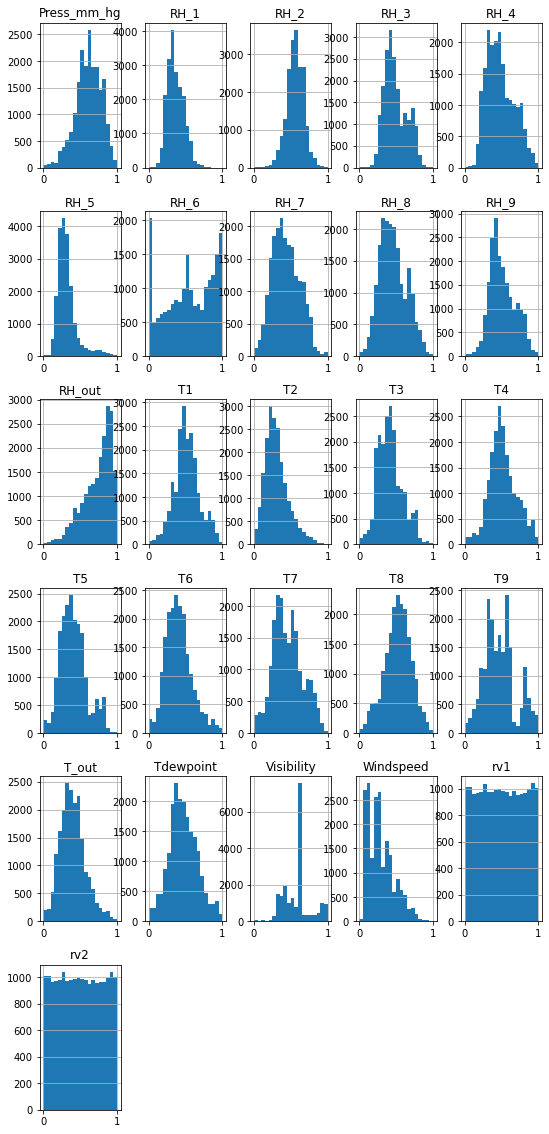

In [10]:
feature_var.hist(bins = 20 , figsize= (9,20)) ;

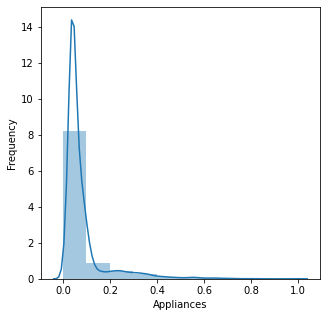

In [15]:
f = plt.figure(figsize=(5,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_var, bins=10 ) ;



# Quiz

1)In the Linear regression, L2 regularization is equivalent to imposing a:

Answer: Gaussian prior

2)Cross validation:

In [ ]:
Answer: Is quaranteed to prevent overfitting.

3)Ridge Regression:

In [ ]:
Answer: Reduces variance at the expence of higher bias.

4)In the different terms of the bias-tradeoff, which of the following is substantially more harmful to the test error than the training error?

In [ ]:
Answer: Variance.

5)What can you use to find the best fit line for Linear Regression?

In [ ]:
Answer: Least Square Error.(The linear Regression uses the least square methode as its cost funtion and aims to reduce this cost funtion i.e reducing the distance between the actual point and the line of best fit.)

6)Which of the following is true about outliers in linear regression?

Answer:Linear regression is sensitive to outliers. (The slope or gradient of the regression line will change due to outliers in most of the cases hence Linear Regression is definately sensitive to outliers.)

7)How many coefficients do you need to estimate a simple linear regression model(One, independent variable)?

Answer: 2. (y = mx + c) where m and c are the coefficients of regression.

8)Adding more bias functions in a linear model:

In [ ]:
Answer: Decreases model bias

9)A best fit line relating X and Y has a R-squared value of 0.75. How do I interpret this information?

In [ ]:
Answer: 75% of the variance in Y is explained by X.

10) The Lasso can be interpreted as least-squares regression where:

In [ ]:
Answer: Weights are regularized with the L1 norm.

11)Which of these assumptions of Linear Regression?

12)From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [79]:
train_x=x_train[['T2']]
train_y=x_train[['T6']]
test_x= x_test[['T2']]
test_y= x_test[['T6']]
model=LinearRegression()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
R2_score=round(r2_score(test_y,prediction),2)
R2_score

0.64

13)Question 13: What is the mean absolute error of the main dataset

In [81]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred=lin_reg.predict(x_test)
MAE=round(mean_absolute_error(y_pred,y_test),2)
MAE

0.05

14)What is the Residual Sum of Squares(in two decimal places)

In [82]:
RSS=round(np.sum(np.square(y_test-y_pred)),2)
RSS

45.35

15) What is the Root Mean Squared Error(in three decimal places)

In [90]:
RMSE=round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
RMSE

0.088

16)What is the Coefficient of Determination(in two decimal places) and r2 value

In [91]:
R2_score=r2_score(y_test,y_pred)
round(R2_score,2)

0.15

17)Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [102]:
def get_weights_df(model,feat,col_name):
    weights=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_weights_df=get_weights_df(lin_reg,x_train,'Linear Weight')
linear_weights_df

,Features,Linear Weight
0,rv2,-6.347156e+10
1,RH_2,-4.566222e-01
2,T_out,-3.218423e-01
3,T2,-2.361131e-01
4,T9,-1.899177e-01
5,RH_8,-1.575747e-01
6,RH_out,-7.767868e-02
7,RH_7,-4.462568e-02
8,RH_9,-3.980029e-02
9,T5,-1.566246e-02


18)Train a Ridge Regression model with an alpha value of 0.4. Is there any change to the root mean squared error(RMSE) when evaluated on the test set?

In [109]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred=ridge.predict(x_test)
ridge_rmse=round(np.sqrt(mean_squared_error(pred,y_test)),3)
print(f'Without alpha:{ridge_rmse}')


ridge_reg=Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)
alpha_pred=ridge_reg.predict(x_test)
ridge_alpha=round(np.sqrt(mean_squared_error(alpha_pred,y_test)),3)
print(f'With alpha:{ridge_alpha}')

Without alpha:0.088
With alpha:0.088


19)Train a Lasso regression model with an aplha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [121]:
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)
lasso_preds=lasso_reg.predict(x_test)

def get_weights_df(model,feat,col_name):
    weights=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df

lasso_weights_df=get_weights_df(lasso_reg,x_train,'Lasso Weights')
lasso_weights_df

#for non zeros
non_zero_weights=lasso_weights_df[lasso_weights_df['Lasso Weights'] != 0]
non_zero_weights


,Features,Lasso Weights
0,RH_out,-0.049557
1,RH_8,-0.000110
24,Windspeed,0.002912
25,RH_1,0.017880


20)What is the new RMSE with Lasso Regression (in 3 decimal places)

In [122]:
RMSE_new=round(np.sqrt(mean_squared_error(y_test,lasso_preds)),3)
RMSE_new

0.094